### Sadaf Sadeghian  810195419

# MNIST

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
trainData = pd.read_csv('./MNIST/train_data.csv', header = None)
trainLabels = pd.read_csv('./MNIST/train_label.csv', header = None, names = ['label'])
testData = pd.read_csv('./MNIST/test_data.csv', header = None)
testLabels = pd.read_csv('./MNIST/test_label.csv', header = None, names = ['label'])

## Visualization

In [3]:
def visualize(digit):
    image = np.array(digit, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

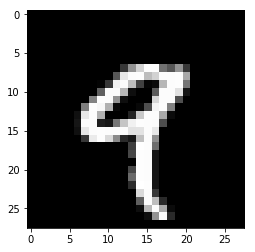

In [4]:
digitNine = trainData.loc[trainLabels['label']==9]
nineDigit =digitNine.iloc[0]
visualize(nineDigit)

## K-Nearest Neighbors 

<b>1.</b> <br>
K-Nearest Neighbors is a classification algorithms in Machine Learning which belongs to the supervised learning domain. <br>
KNN algorithm is based on the assumption that similar data points are close to each other.
Given an unclassified point, we can assign it to a group by observing what group its nearest neighbors belong to; So a proper function should be used based on the problem for calculating the distance between points on the feature space to find nearest neighbors.

<b> 2. </b> <br>

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
for i in range(1, 7):
    neighTest = KNeighborsClassifier(n_neighbors = i)
    neighTest.fit(trainData.values, trainLabels.values.ravel() )
    print("k =",i, " score =",  neighTest.score(testData.values, testLabels.values.ravel()))

k = 1  score = 0.86
k = 2  score = 0.87
k = 3  score = 0.895
k = 4  score = 0.9
k = 5  score = 0.89
k = 6  score = 0.885


Using score function we can observe that by increasing k from 1 to 4, the score increases and after that score decreases as we increase k.<br>
So we will use k = 4

In [7]:
k= 4
neighClf = KNeighborsClassifier(n_neighbors=k)
neighClf.fit(trainData.values, trainLabels.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

Accuracy:  0.9


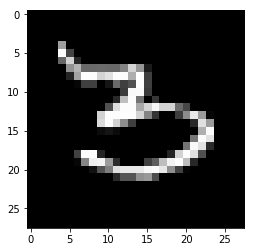

Predicted digit: 2


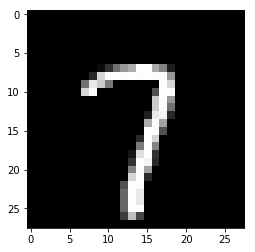

Predicted digit: 7


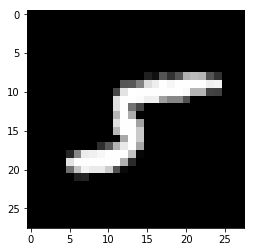

Predicted digit: 5


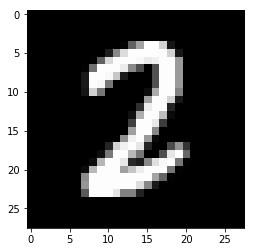

Predicted digit: 2


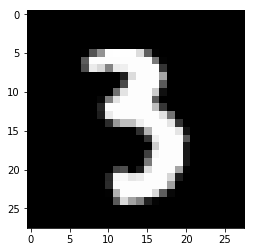

Predicted digit: 3


In [8]:
testNum = 200
pred = neighClf.predict(testData.iloc[0:testNum].values)

correctPred = 0;
for index, predicted in enumerate(pred):
    if predicted == testLabels.values[index]:
        correctPred += 1
print("Accuracy: ", correctPred / testNum)   

for index, digit in enumerate(testData.iloc[0:5].values):
    visualize(digit)
    print("Predicted digit:", pred[index])

<b> 3. </b>

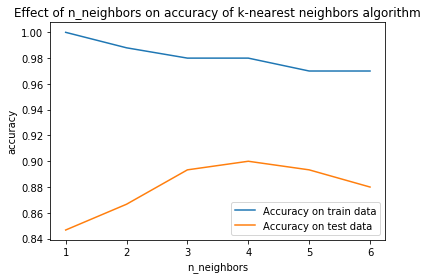

In [9]:
n1 = 150
n2 = 500
testAcc = []
trainAcc = []
kRange = range(1, 7)

for i in kRange:
    neighTest = KNeighborsClassifier(n_neighbors = i)
    neighTest.fit(trainData.values, trainLabels.values.ravel() )
    
    trainAcc.append(neighTest.score(trainData.iloc[0:n2].values, trainLabels.iloc[0:n2].values.ravel()))
    testAcc.append(neighTest.score(testData.iloc[0:n1].values, testLabels.iloc[0:n1].values.ravel()))

plt.plot(kRange, trainAcc)
plt.plot(kRange, testAcc)
plt.legend(['Accuracy on train data', 'Accuracy on test data'], loc='lower right')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('Effect of n_neighbors on accuracy of k-nearest neighbors algorithm')
plt.show()

Accuracy on test data is maximum when k = 4

<b> 4. </b> <br>
Obviously accuracy on train data is maximum in k = 1 as each example will get its own label and by increasing k in accuracy decreases and loss increases as it will match the example with more samples which are not that sample exactly.

<b> 5. </b> <br>

Test example:


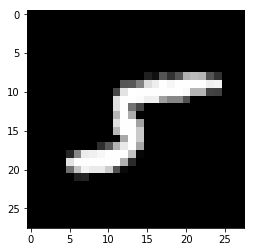

Neighbors: 


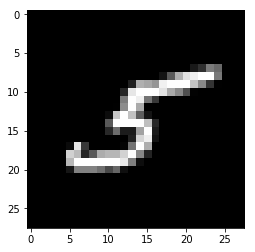

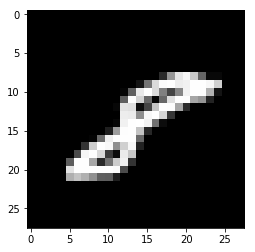

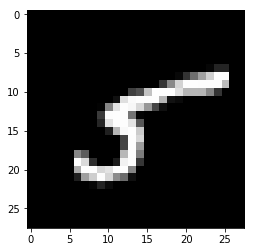

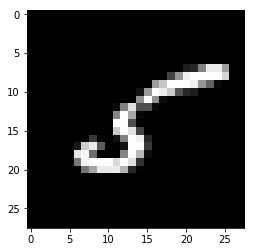

In [10]:
testExampleIndex = 2

print("Test example:")
visualize(testData.iloc[testExampleIndex].values)
thisNeigh = neighClf.kneighbors([testData.iloc[testExampleIndex]])

print("Neighbors: ")
for n in thisNeigh[1][0]:
    visualize(trainData.iloc[n].values)

<b> 6. </b> <br>
- Computationally expensive : We need to compute distance of each example to all training samples. As it is a lazy learning method, it requires that most of computation be done during testing, rather than during training which can be an issue for large datasets and make the algorithm slow.
- Optimal number of neighbors: Choosing the optimal number of neighbors to be consider while classifying the new data entry is one of the issues.
- High memory requirement: All or almost all of the training samples need to be stored in memory.

## Desicion Tree

<b> 7. </b> <br>
Decison trees are a non-parametric supervised learning method used for classification. <br>
A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a class label.


<b> 8. </b>

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
treeClf = DecisionTreeClassifier(max_depth = 13, random_state = 0, min_samples_leaf = 1, max_leaf_nodes = 170
                                 , min_samples_split  = 4, max_features = 200)
treeClf.fit(trainData.values, trainLabels.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=200, max_leaf_nodes=170,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy: 0.73 


Some of test examples
__________________________________________________
Test example:


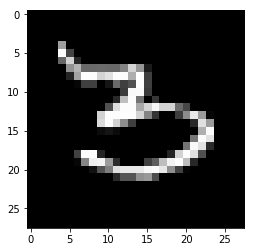

Predicted digit: 5
__________________________________________________
Test example:


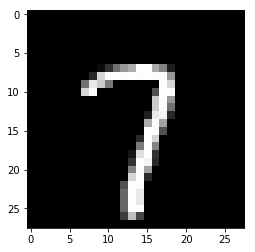

Predicted digit: 7
__________________________________________________
Test example:


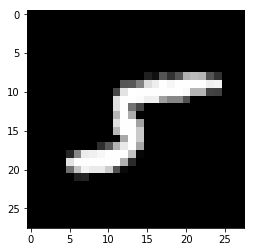

Predicted digit: 8
__________________________________________________
Test example:


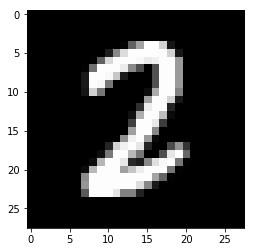

Predicted digit: 2
__________________________________________________
Test example:


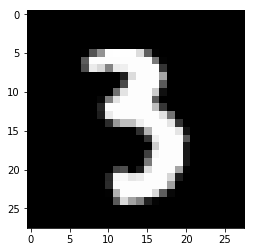

Predicted digit: 5
__________________________________________________


In [56]:
pred = treeClf.predict(testData.iloc[0:200].values)

correctPred = 0;
for index, predicted in enumerate(pred):
    if predicted == testLabels.values[index]:
        correctPred += 1
print("Accuracy:", correctPred / testNum, "\n\n") 

print("Some of test examples")
print("_"*50)
for index, digit in enumerate(testData.iloc[0:5].values):
    print("Test example:")
    visualize(digit)
    print("Predicted digit:", pred[index])
    print("_"*50)

<b> 9. </b>

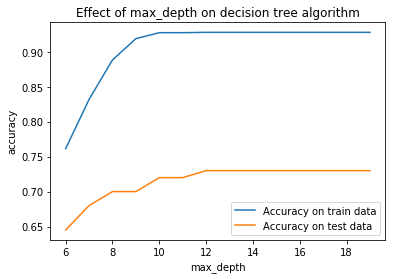

In [59]:
testAccTree = []
trainAccTree = []
maxDepthRange = range(6, 20)

for i in maxDepthRange:
    treeTest = DecisionTreeClassifier(max_depth = i, random_state = 0, min_samples_leaf = 1, max_leaf_nodes = 170
                                      , min_samples_split  = 4, max_features = 200)
    treeTest.fit(trainData.values, trainLabels.values.ravel())
    
    trainAccTree.append( treeTest.score(trainData.values, trainLabels.values.ravel()))
    testAccTree.append( treeTest.score(testData.values, testLabels.values.ravel()))
    
plt.plot(maxDepthRange, trainAccTree)
plt.plot(maxDepthRange, testAccTree)
plt.legend(['Accuracy on train data', 'Accuracy on test data'], loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of max_depth on decision tree algorithm')
plt.show()

The optimum accuracy on test data occurs when max_depth = 12

<b> 10. </b>

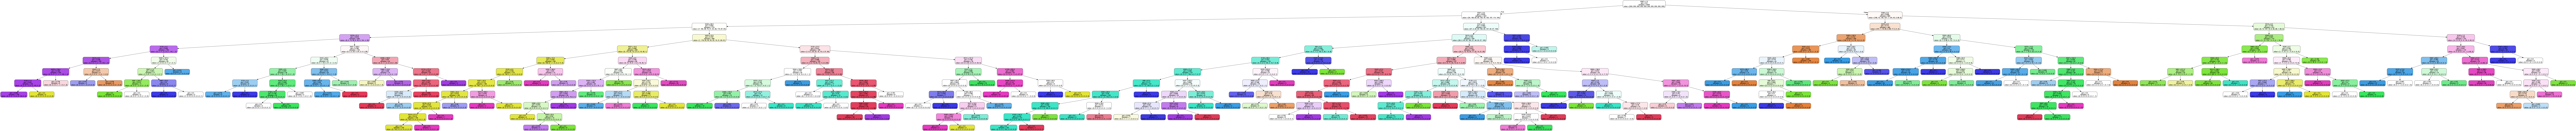

In [58]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

dot_data = export_graphviz(treeClf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

<b> 11. </b> <br>
Overfitting in decision tree occurs when the decisions of decision tree are not general anymore and it makes its decisions specifically based on the training examples. 

Thus increasing max_depth can lead to overfitting. As it is shown below, model accuracy is high with respect to the data used in training and it approaches 1 but drops to 0.7 with test data which indicates overfitting.

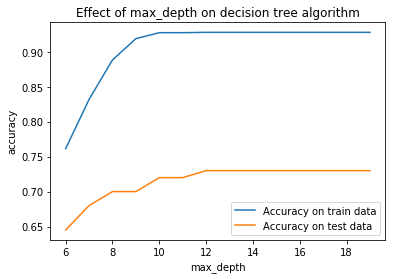

In [77]:
testAccTree = []
trainAccTree = []
maxDepthRange = range(6, 20)

for i in maxDepthRange:
    treeTest = DecisionTreeClassifier(max_depth = i, random_state = 0, min_samples_leaf = 1, max_leaf_nodes = 170
                                      , min_samples_split  = 4, max_features = 200)
    treeTest.fit(trainData.values, trainLabels.values.ravel())
    
    trainAccTree.append( treeTest.score(trainData.values, trainLabels.values.ravel()))
    testAccTree.append( treeTest.score(testData.values, testLabels.values.ravel()))
    
plt.plot(maxDepthRange, trainAccTree)
plt.plot(maxDepthRange, testAccTree)
plt.legend(['Accuracy on train data', 'Accuracy on test data'], loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of max_depth on decision tree algorithm')
plt.show()

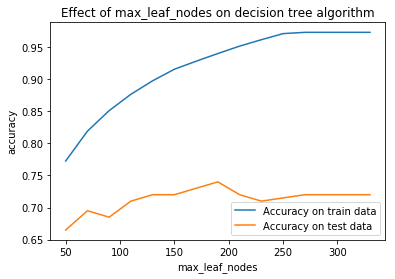

In [64]:
testAccTree = []
trainAccTree = []
kRange = range(50, 350, 20)

for i in kRange:
    treeTest = DecisionTreeClassifier(max_depth = 12, random_state = 0, min_samples_leaf = 1, max_leaf_nodes = i
                                      , min_samples_split  = 4, max_features = 200)
    treeTest.fit(trainData.values, trainLabels.values.ravel())
    
    trainAccTree.append( treeTest.score(trainData.values, trainLabels.values.ravel()))
    testAccTree.append( treeTest.score(testData.values, testLabels.values.ravel()))
    
plt.plot(kRange, trainAccTree)
plt.plot(kRange, testAccTree)
plt.legend(['Accuracy on train data', 'Accuracy on test data'], loc='lower right')
plt.xlabel('max_leaf_nodes')
plt.ylabel('accuracy')
plt.title('Effect of max_leaf_nodes on decision tree algorithm')
plt.show()

Another parameter that can cause overfitting is max_leaf_nodes that gives the number of leafs in decision tree.By increasing max_leaf_nodes we can have almost each of the training examples in leafs and thus the model will not be general and become overfitted.

## Random Forest

<b> 12. </b> <br>
Random Forest is a supervised learning algorithm which can be used for both classification and regression problems. <br>
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction; to say more, For classifying a new object from an input vector, we put the input vector down each of the trees in the forest. Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes.

<b> 13. </b>

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
randomClf = RandomForestClassifier(n_estimators=120, max_depth=11, random_state=0, max_features = 8
                                   , min_samples_split = 3)
randomClf.fit(trainData.values, trainLabels.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
n1 = 200
n2 = 500

print("Accuracy on TrainData : ", randomClf.score(trainData.iloc[0:n2].values, trainLabels.iloc[0:n2].values.ravel()))
print("Accuracy on TestData :",randomClf.score(testData.iloc[0:n1].values, testLabels.iloc[0:n1].values.ravel()))


Accuracy on TrainData :  1.0
Accuracy on TestData : 0.93


<b> 14. </b>

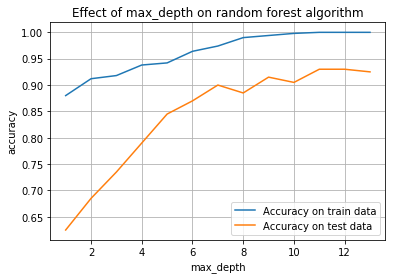

In [21]:
n1 = 200
n2 = 500
testAcc = []
trainAcc = []
kRange = range(1, 14)

for i in kRange:
    randomTest = RandomForestClassifier(n_estimators=120, max_depth=i, random_state=0, max_features = 8
                                        , min_samples_split = 3)
    randomTest.fit(trainData.values, trainLabels.values.ravel())
    
    trainAcc.append(randomTest.score(trainData.iloc[0:n2].values, trainLabels.iloc[0:n2].values.ravel()))
    testAcc.append(randomTest.score(testData.iloc[0:n1].values, testLabels.iloc[0:n1].values.ravel()))

plt.plot(kRange, trainAcc)
plt.plot(kRange, testAcc)
plt.legend(['Accuracy on train data', 'Accuracy on test data'], loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of max_depth on random forest algorithm')
plt.grid()
plt.show()

Accuracy on test data is maximum when max_depth = 11

<b> 15. </b>

<b>n_estimators :</b><br>
The number of trees in the random forest

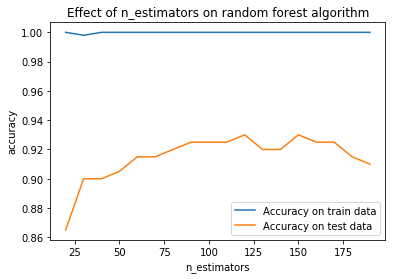

In [22]:
n1 = 200
n2 = 500
testAcc = []
trainAcc = []
kRange = range(20, 200, 10)

for i in kRange:
    randomTest = RandomForestClassifier(n_estimators=i, max_depth=11, random_state=0, max_features = 8
                                        , min_samples_split = 3)
    randomTest.fit(trainData.values, trainLabels.values.ravel())
    
    trainAcc.append(randomTest.score(trainData.iloc[0:n2].values, trainLabels.iloc[0:n2].values.ravel()))
    testAcc.append(randomTest.score(testData.iloc[0:n1].values, testLabels.iloc[0:n1].values.ravel()))

plt.plot(kRange, trainAcc)
plt.plot(kRange, testAcc)
plt.legend(['Accuracy on train data', 'Accuracy on test data'], loc='lower right')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Effect of n_estimators on random forest algorithm')
plt.show()

Accuracy on test data is maximum when n_estimators = 120

<b>min_samples_split:</b><br>
Minimum number of data points placed in a node before the node is split, in other words, minimum number of samples required to split a node

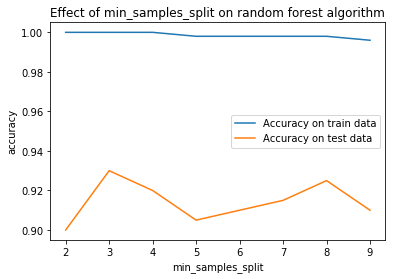

In [23]:
n1 = 200
n2 = 500
testAcc = []
trainAcc = []
kRange = range(2,10)

for i in kRange:
    randomTest = RandomForestClassifier(n_estimators=120, max_depth=11, random_state=0, max_features = 8
                                        , min_samples_split = i)
    randomTest.fit(trainData.values, trainLabels.values.ravel())
    
    trainAcc.append(randomTest.score(trainData.iloc[0:n2].values, trainLabels.iloc[0:n2].values.ravel()))
    testAcc.append(randomTest.score(testData.iloc[0:n1].values, testLabels.iloc[0:n1].values.ravel()))

plt.plot(kRange, trainAcc)
plt.plot(kRange, testAcc)
plt.legend(['Accuracy on train data', 'Accuracy on test data'], loc='center right')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.title('Effect of min_samples_split on random forest algorithm')
plt.show()

Accuracy on test data is maximum when min_samples_split = 3

<b>max_features:</b><br>
Number of features to consider when looking for the best split

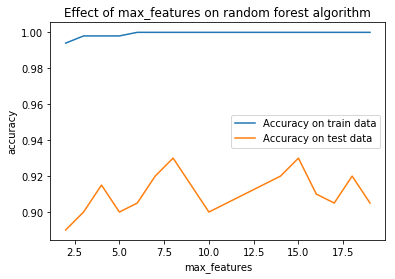

In [24]:
n1 = 200
n2 = 500
testAcc = []
trainAcc = []
kRange = range(2,20)

for i in kRange:
    randomTest = RandomForestClassifier(n_estimators=120, max_depth=11, random_state=0, max_features = i
                                        , min_samples_split = 3)
    randomTest.fit(trainData.values, trainLabels.values.ravel())
    
    trainAcc.append(randomTest.score(trainData.iloc[0:n2].values, trainLabels.iloc[0:n2].values.ravel()))
    testAcc.append(randomTest.score(testData.iloc[0:n1].values, testLabels.iloc[0:n1].values.ravel()))

plt.plot(kRange, trainAcc)
plt.plot(kRange, testAcc)
plt.legend(['Accuracy on train data', 'Accuracy on test data'], loc='center right')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.title('Effect of max_features on random forest algorithm')
plt.show()

Accuracy is maximum on test data when max_features = 8

<b>16.</b>

In [25]:
n1 = 200
n2 = 500

randomClf = RandomForestClassifier(n_estimators=1, max_depth=7, random_state=0, max_features = 8
                                   , min_samples_split = 3)
randomClf.fit(trainData.values, trainLabels.values.ravel())

print("Accuracy on TrainData : ", randomClf.score(trainData.iloc[0:n2].values, trainLabels.iloc[0:n2].values.ravel()))
print("Accuracy on TestData :",randomClf.score(testData.iloc[0:n1].values, testLabels.iloc[0:n1].values.ravel()))

Accuracy on TrainData :  0.784
Accuracy on TestData : 0.525


In [26]:
treeClf = DecisionTreeClassifier(max_depth = 16, random_state = 0)
treeClf.fit(trainData.values, trainLabels.values.ravel())
print("Accuracy on TrainData : ", treeClf.score(trainData.iloc[0:n2].values, trainLabels.iloc[0:n2].values.ravel()))
print("Accuracy on TestData :",treeClf.score(testData.iloc[0:n1].values, testLabels.iloc[0:n1].values.ravel()))

Accuracy on TrainData :  1.0
Accuracy on TestData : 0.725


## Logistic Regression

<b> 17. </b><br>
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

<b> 18. </b>

In [27]:
from sklearn.linear_model import LogisticRegression


logisticRegClf = LogisticRegression(solver='lbfgs', max_iter = 450, multi_class = 'auto')
logisticRegClf.fit(trainData.values, trainLabels.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=450,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
n1 = 200
n2 = 500

print("Accuracy on TrainData : ", logisticRegClf.score(trainData.iloc[0:n2].values, trainLabels.iloc[0:n2].values.ravel()))
print("Accuracy on TestData :",logisticRegClf.score(testData.iloc[0:n1].values, testLabels.iloc[0:n1].values.ravel()))

Accuracy on TrainData :  1.0
Accuracy on TestData : 0.85


## K-Means

<b> 19. </b><br>
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data. The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 

<b> 20. </b>

In [29]:
from sklearn.cluster import KMeans

kmeansClf = KMeans(n_clusters=10, random_state=0)
clusters = kmeansClf.fit(trainData.values)

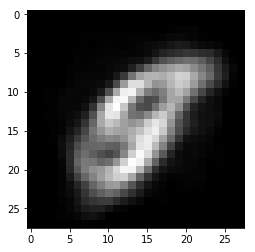

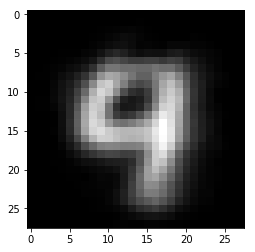

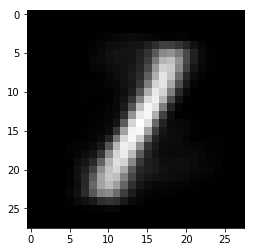

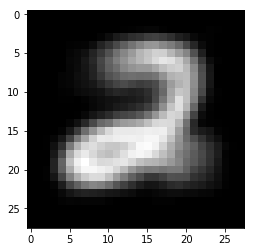

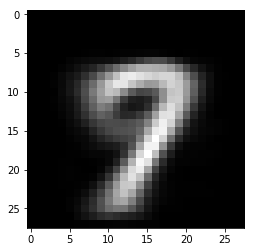

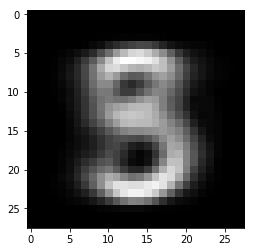

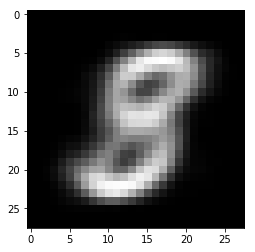

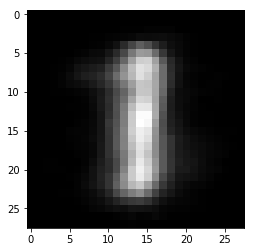

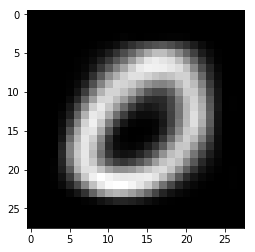

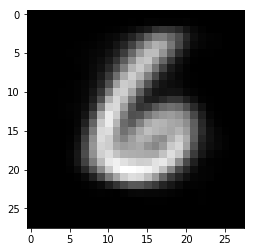

In [30]:
centers = kmeansClf.cluster_centers_
for c in centers:
    visualize(c)

<b> 21. </b>

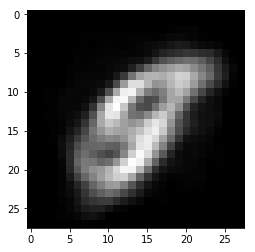

5


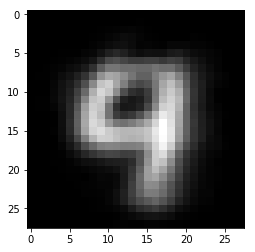

4


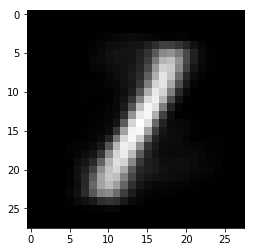

1


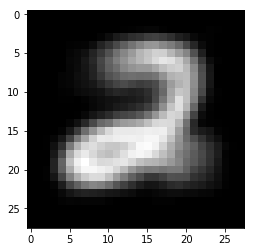

2


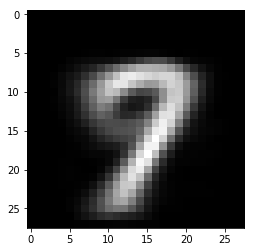

7


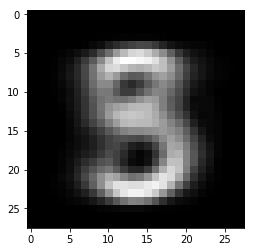

3


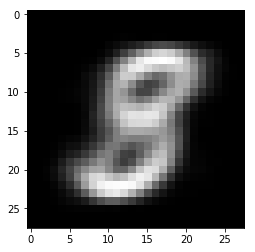

8


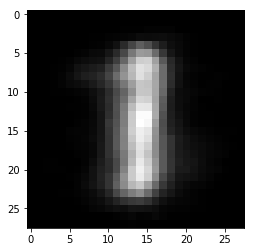

1


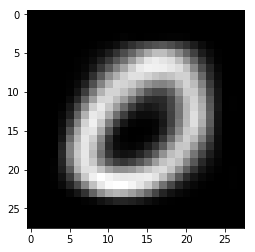

0


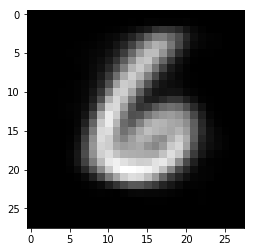

6


In [31]:
labels = []

for c in centers:
    neigh = KNeighborsClassifier(n_neighbors = 1)
    neigh.fit(trainData.values, trainLabels.values.ravel() )
    visualize(c)
    label = neigh.predict(c.reshape(1,784))[0]
    labels.append(label)
    print(label)
    

In [32]:
pred = kmeansClf.predict(testData.values)

def toLabel(n): 
    return labels[n] 
   
predictedLabels = map(toLabel, pred) 

correctPred = 0;
for index, predicted in enumerate(predictedLabels):
    if predicted == testLabels.values[index]:
        correctPred += 1
print("Accuracy: ", correctPred / testNum)   

Accuracy:  0.555


<b> 22. </b>

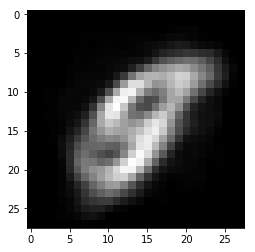

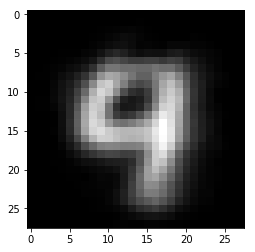

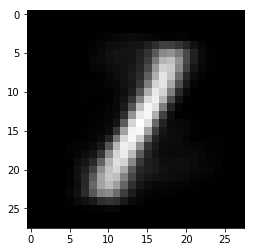

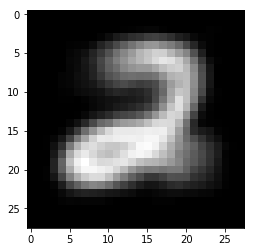

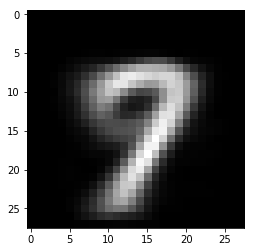

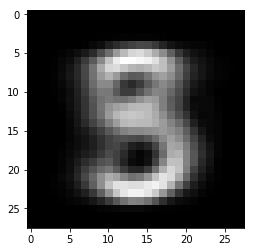

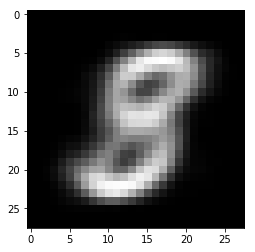

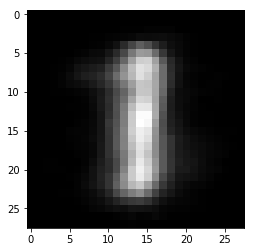

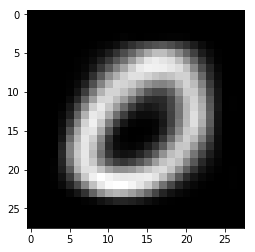

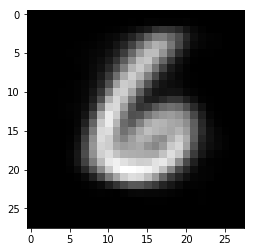

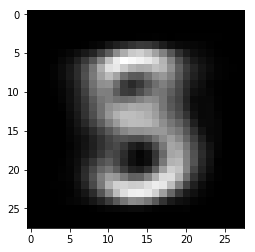

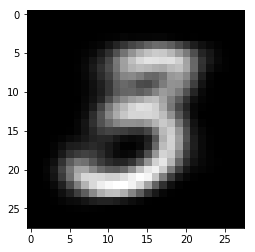

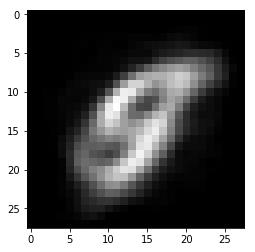

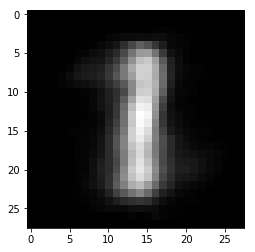

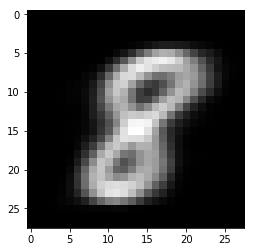

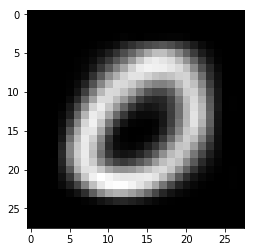

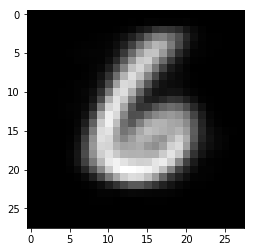

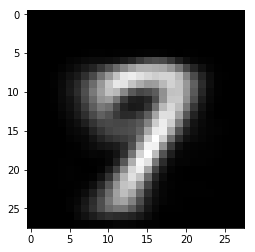

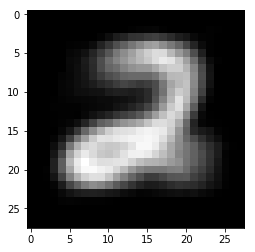

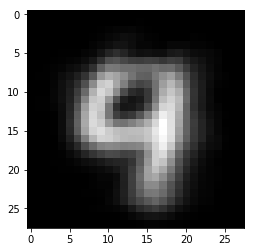

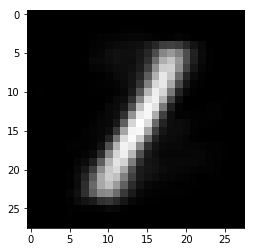

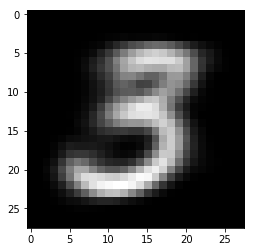

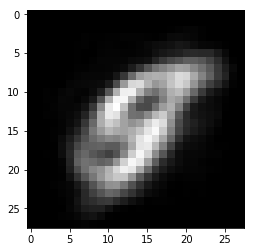

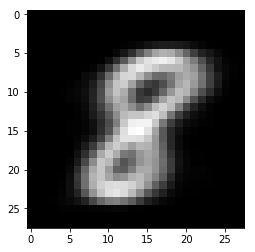

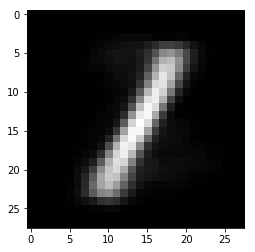

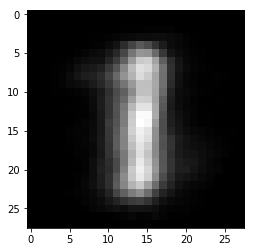

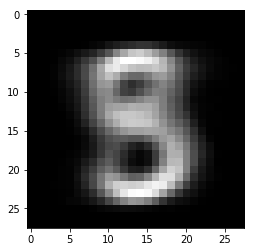

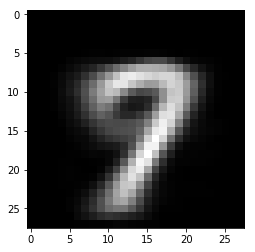

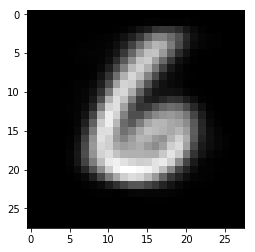

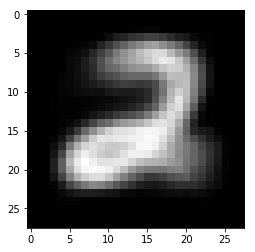

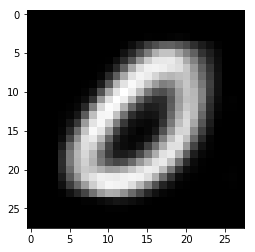

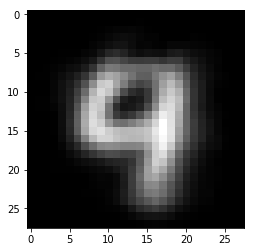

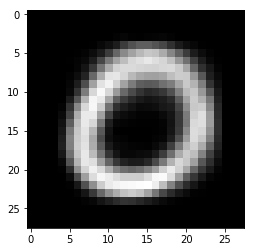

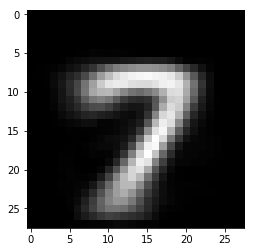

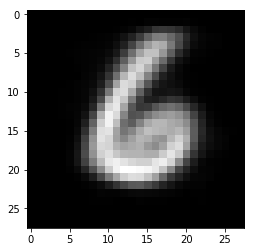

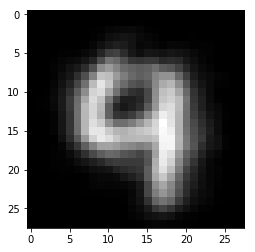

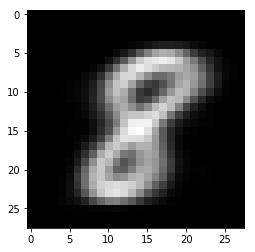

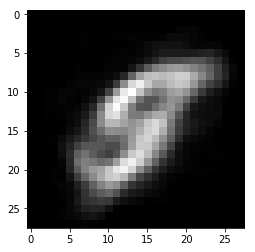

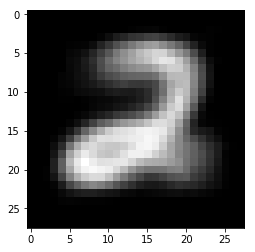

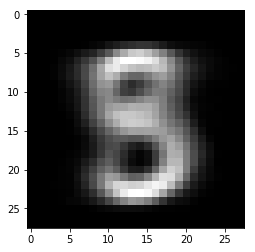

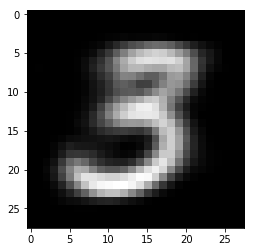

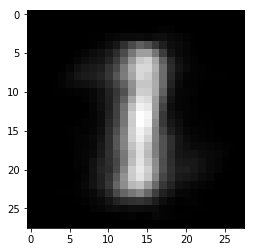

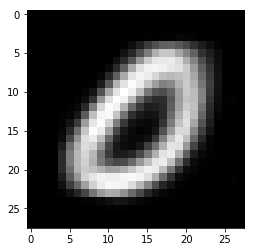

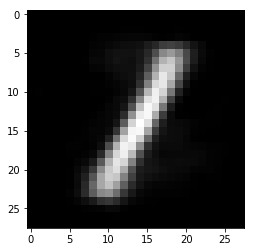

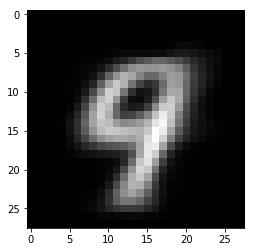

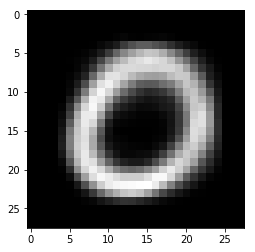

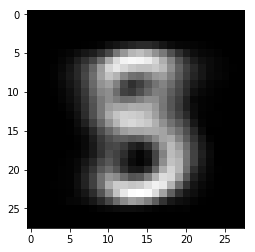

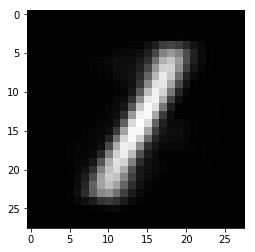

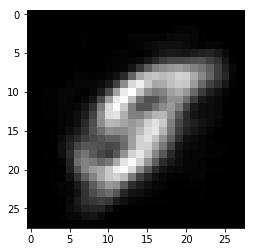

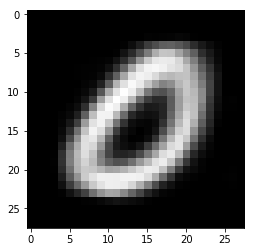

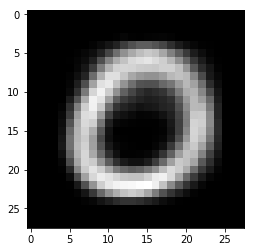

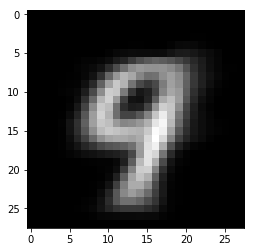

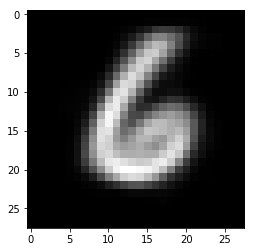

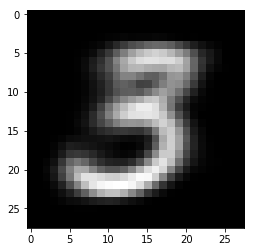

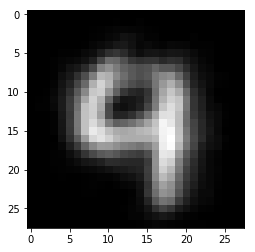

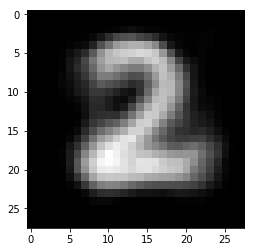

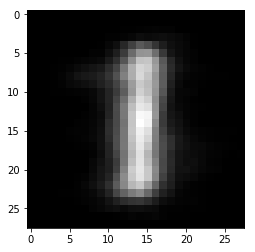

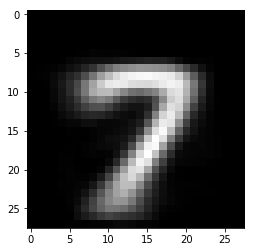

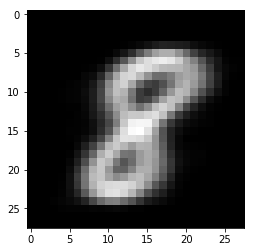

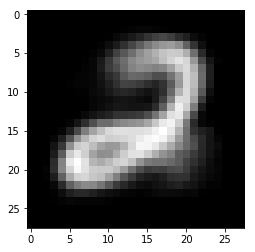

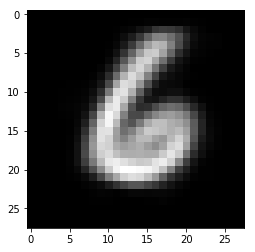

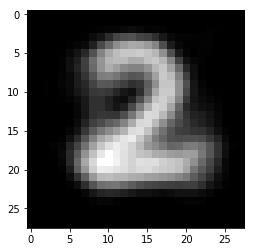

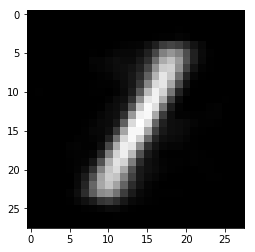

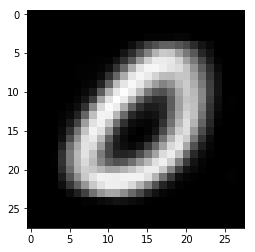

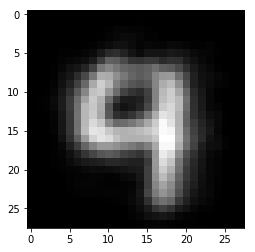

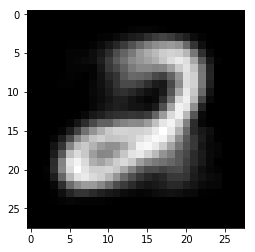

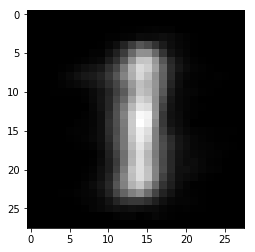

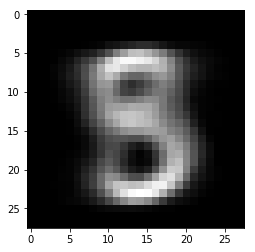

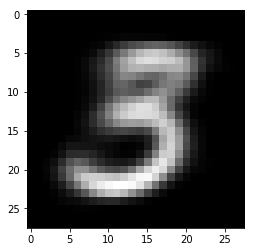

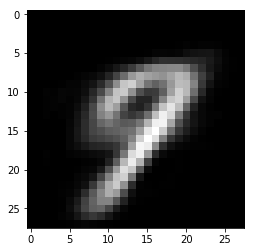

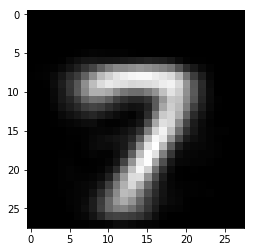

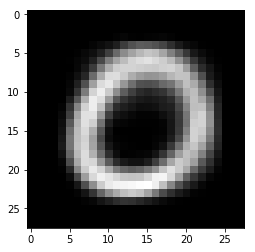

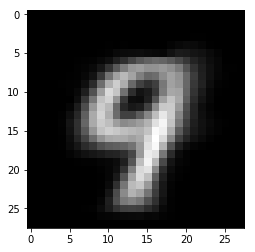

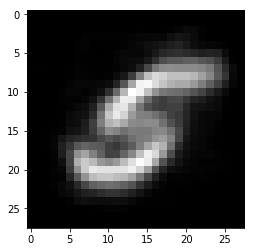

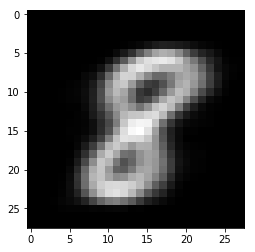

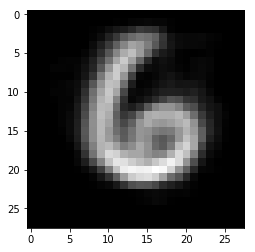

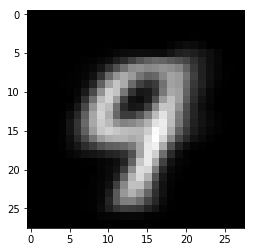

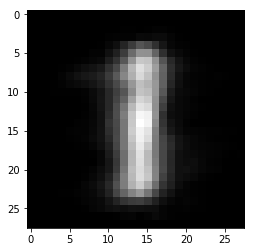

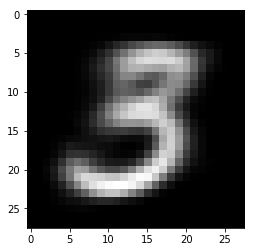

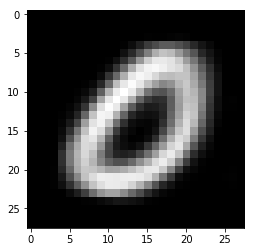

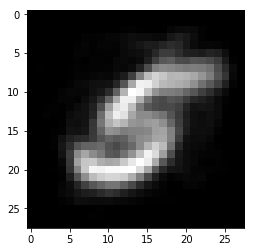

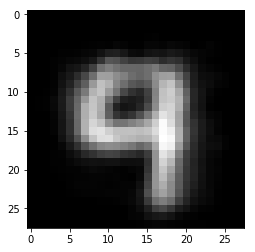

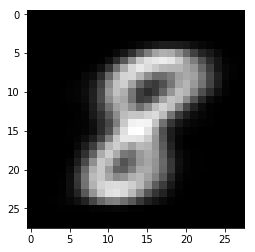

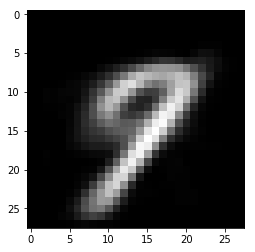

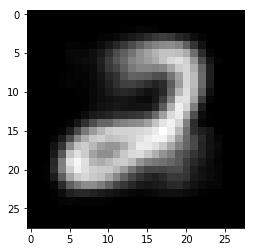

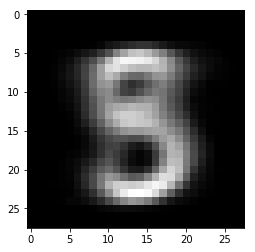

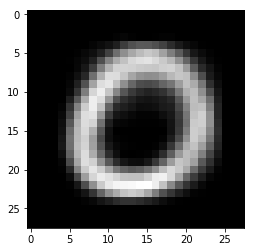

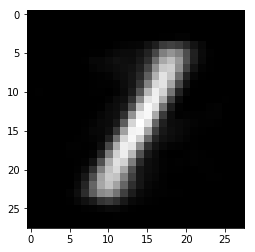

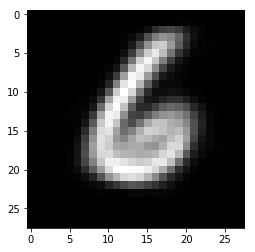

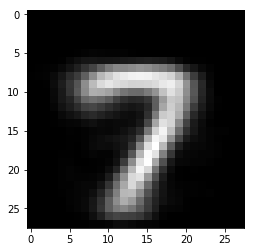

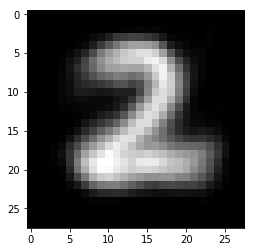

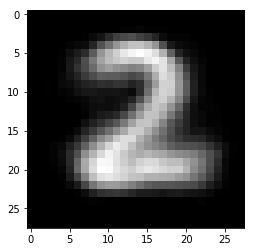

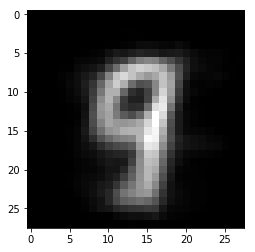

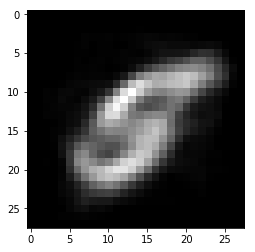

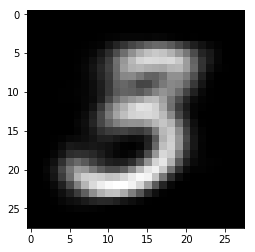

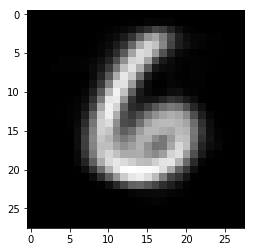

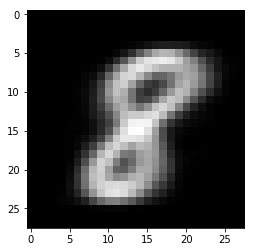

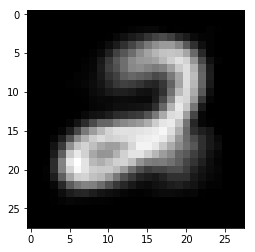

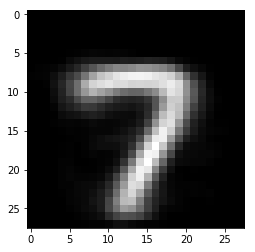

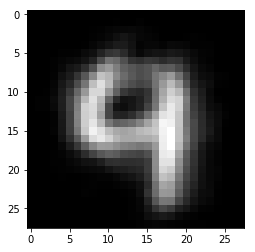

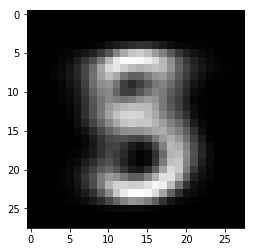

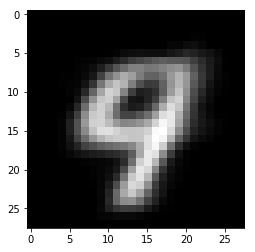

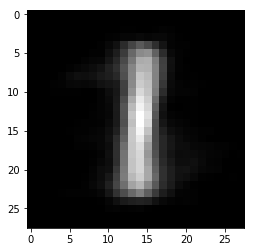

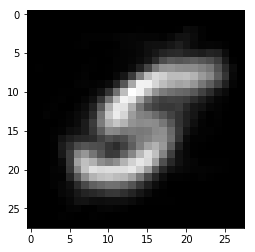

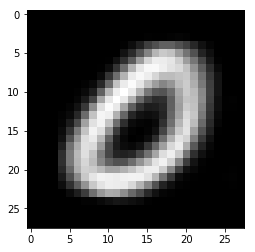

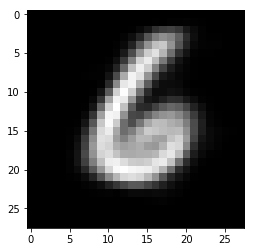

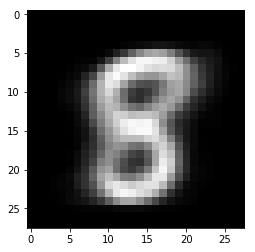

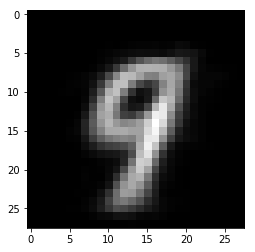

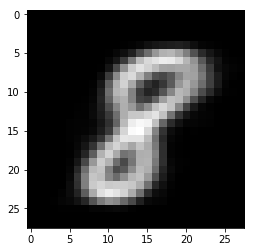

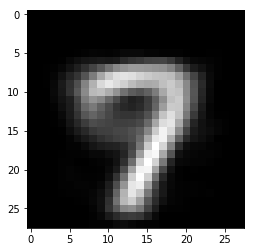

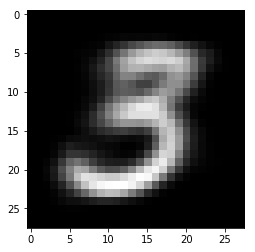

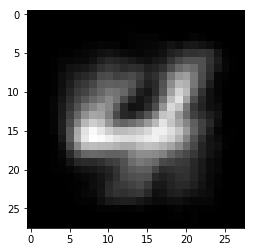

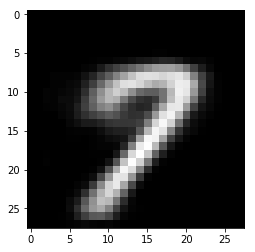

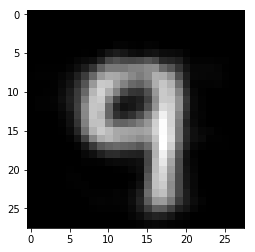

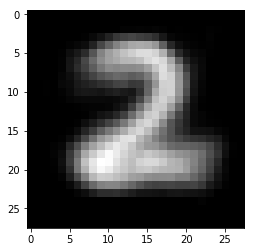

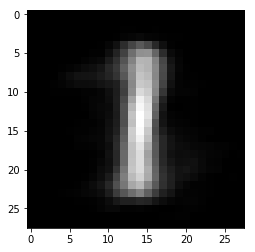

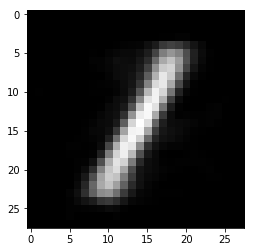

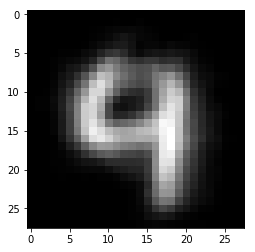

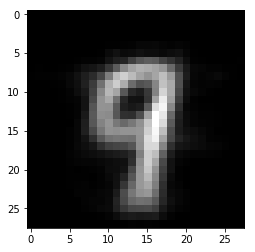

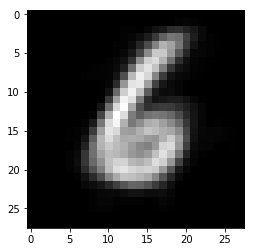

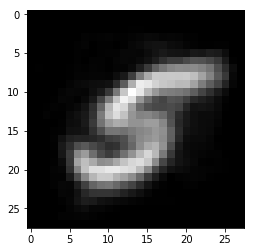

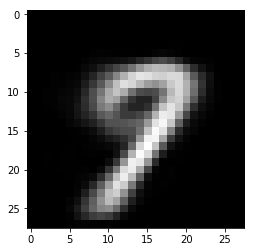

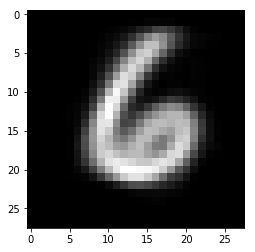

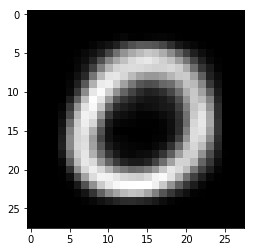

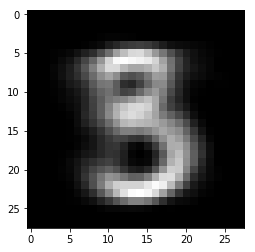

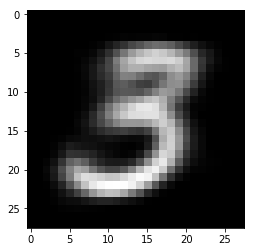

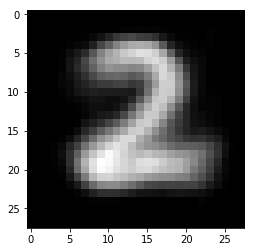

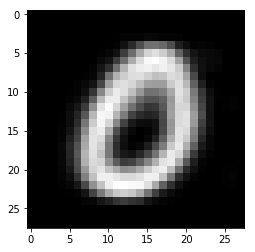

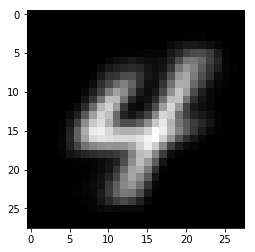

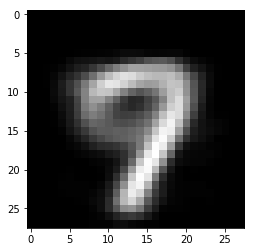

In [33]:
from sklearn.cluster import KMeans

def toLabel(n): 
    return labels[n] 

kRange = range(10, 20)
for i in kRange:
    kmeansTest = KMeans(n_clusters=i, random_state=0)
    clusters = kmeansTest.fit(trainData.values)

    centers = kmeansTest.cluster_centers_
    for c in centers:
        neigh = KNeighborsClassifier(n_neighbors = 1)
        neigh.fit(trainData.values, trainLabels.values.ravel() )
        visualize(c)
        label = neigh.predict(c.reshape(1,784))[0]
        labels.append(label)
    pred = kmeansClf.predict(testData.values)
    predictedLabels = map(toLabel, pred) 

correctPred = 0;
for index, predicted in enumerate(predictedLabels):
    if predicted == testLabels.values[index]:
        correctPred += 1